## Answers
1) c
2) b
3) c
4) b
5) 

In [51]:
#2)
import math
epsilon = 0.1
delta = 0.05
H = math.pow(3,3)
m = 1/epsilon * (math.log(H) + math.log(1/delta))
m

62.915691395583195

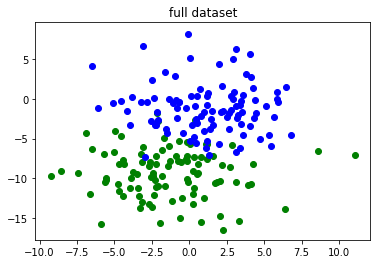

ValueError: Found input variables with inconsistent numbers of samples: [100, 200]

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# ========================================================================
# dataset

n_tot = 200
# two blobs, not completely separated
X, y = make_blobs(n_tot, centers=2, cluster_std=3.0, random_state=2)

plt.figure()
colors = ["g", "b"]
for ii in range(2):
    class_indices = np.where(y==ii)[0]
    plt.scatter(X[class_indices, 0], X[class_indices, 1], c=colors[ii])
plt.title("full dataset")
plt.show()

# divide data into training and testing
# NOTE! Test data is not needed in solving the exercise
# But it can be interesting to investigating how that behaves w.r.t. training set
# performance and the bounds :)
np.random.seed(42)
order = np.random.permutation(n_tot)
train = order[:100]
# test = order[100:]

Xtr = X[train, :]
ytr = y[train]
# Xtst = X[test, :]
# ytst = y[test]

# ========================================================================
# classifier

# The perceptron algorithm will be encountered later in the course
# How exactly it works is not relevant yet, it's enough to just know it's a binary classifier
from sklearn.linear_model import Perceptron as binary_classifier

# # It can be used like this:
# bc = binary_classifier()
# bc.fit(Xtr, ytr)  # train the classifier on training data
# preds = bc.predict(Xtst)  # predict with test data

# ========================================================================
# setup for analysing the Rademacher complexity

# consider these sample sizes
print_at_n = [20, 50, 100]
# when analysing Rademacher complexity, take always n first samples from training set, n as in this array

delta = 0.05

# todo solution

constant = []
error = []
rademacher = []


from sklearn.metrics import mean_squared_error
from sklearn.metrics import zero_one_loss 
import math

for i in range(len(print_at_n)):
    constant.append( 3 * math.sqrt(math.log(2/delta)/(2*print_at_n[i])) )
    bc = binary_classifier()
    bc.fit(Xtr[:print_at_n[i]], ytr[:print_at_n[i]])
    preds = bc.predict(Xtr[:print_at_n[i]])
    error.append( zero_one_loss(ytr[:print_at_n[i]], preds))
    M = 1000
    error_scrambled = []
    for m in range(M+1):
        y_scrambled = np.random.randint(2, size=print_at_n[i])
        bc_scambled = binary_classifier()
        bc_scambled.fit(Xtr[:print_at_n[i]], y_scrambled)
        preds_scambled = bc_scambled.predict(Xtr[:print_at_n[i]])
        error_scrambled.append( zero_one_loss(y_scrambled, preds_scambled)) 
    rademacher_complexity = 1/2 - 1/M*sum(error_scrambled)
    rademacher.append(error[i] + rademacher_complexity + constant[i])
rademacher

plt.scatter(print_at_n,rademacher)
plt.show()